In [3]:
from toolbox import dB2lin, dBm2watts
import numpy as np
from antenna import AntennaArray
import seaborn as sns 
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'toolbox'

### Antenna model.

#### Antenna steering without the codebook.

In [2]:
# Network parameters.
ptx = dBm2watts(25) # Transmit power.
element_gain_dBi = 1 # Antenna element gain.
fc = 30e9 # Carrier frequency in Hz.
wavelen = 3e8/fc # Wave length.
nx, ny, nz = 1, 8, 1 # Distribution of antenna elements. 
dx = dy = dz = wavelen * 0.5 # Distance between antenna elements.
antenna = AntennaArray(wavelen, nx, ny, nz, dx, dy, dz)

gain = []
phis = np.linspace(-np.pi/2, np.pi/2, 200) # Horizontal angles.
for phi in phis:
    element_gain = 10*np.power(10, element_gain_dBi/10) # dBi -> linear.
    m = int(nx*ny*nz) # Number of antenna elements.
    p = np.sqrt(ptx/m) * np.ones((m, 1)) * element_gain # Power spread over antenna elements.
    w = antenna.calc_array_factor( # Radiation pattern.
            theta=np.pi/2, phi=phi
        ).reshape(m, 1)
    w = np.multiply(w, p)
    g = np.power(np.linalg.norm(np.sum(w)), 2) # Gain.
    gain.append(10*np.log10(g))

_ = plt.figure()
ax = sns.lineplot(x=phis, y=gain)
_ = plt.ylabel("Power (dBm)")
_ = plt.ylim([-70, 60])
_ = plt.xlabel("Horizontal angle (radian)")
_ = plt.show()
_ = plt.figure()
_ = plt.polar(phis, gain)
_ = plt.show()

NameError: name 'dBm2watts' is not defined

#### Antenna steering using the codebook.

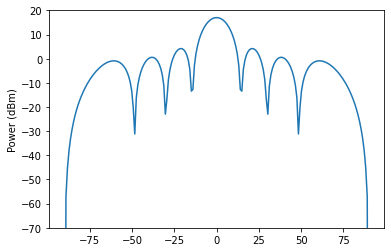

In [3]:
from antenna import AntennaArray

# Network parameters.
ptx = dBm2watts(25) # Transmit power.
element_gain_dBi = 1 # Antenna element gain.
fc = 30e9 # Carrier frequency in Hz.
wavelen = 3e8/fc # Wave length.
nx, ny, nz = 1, 8, 1 # Distribution of antenna elements. 
dx = dy = dz = wavelen * 0.5 # Distance between antenna elements.
nhbeams = 200 # Number of horizontal beams.
nvbeams = 1 # Number of vertical beams.
hangmin, hangmax = -90, 90 # Horizontal angles.
vangmin, vangmax = 0, 0 # Vertical angles.
antenna = AntennaArray(
    wavelen, nx, ny, nz, dx, dy, dz, hbeams=nhbeams, vbeams=nvbeams,
    hangmin=hangmin, hangmax=hangmax, vangmin=vangmin, vangmax=vangmax)

gain = []
phis = []
for codebook_id in antenna.codebook_ids:
    element_gain = 10*np.power(10, element_gain_dBi/10) # dBi -> linear.
    m = int(nx*ny*nz) # Number of antenna elements.
    p = np.sqrt(ptx/m) * np.ones((m, 1)) * element_gain # Power spread over antenna elements.
    w, steering_angle = antenna.steering_vec(codebook_id)
    w = w.reshape(m, 1)
    w = np.multiply(w, p)
    g = np.power(np.linalg.norm(np.sum(w)), 2) # Gain.
    gain.append(10*np.log10(g))
    phis.append(steering_angle[1])

ax = sns.lineplot(x=phis, y=gain)
_ = plt.ylabel("Power (dBm)")
_ = plt.xlabel("")
_ = plt.ylim([-70, 20])